# **Music Recommendation System**

## **Problem Definition**

### **The Context:**

 - With the advent of technology, societies have become more efficient with their lives. At the same
time, however, individual human lives have also become more fast-paced and distracted, leaving
little time to explore artistic pursuits. Also, technology has made significant advancements in the
ability to coexist with art and general entertainment. It has in fact made it easier for humans with a
shortage of time to find and consume good content.
Almost every internet-based company's revenue relies on the time consumers spend on its platform.
These companies need to be able to figure out what kind of content is needed in order to increase
customer time spent and make their experience better. Therefore, one of the key challenges for
these companies is figuring out what kind of content their customers are most likely to consume.
Spotify is one such audio content provider with a huge market base across the world. With the
ever-increasing volume of songs becoming available on the Internet, searching for songs of interest
has become a tedious task in itself. However, Spotify has grown significantly in the market because
of its ability to recommend the ‘best’ next song to each and every customer based on a huge
preference database gathered over time - millions of customers and billions of songs. This is done
by using smart recommendation systems that can recommend songs based on users’ likes/dislikes.

### **The objective:**

 - Build a recommendation system to propose the top 10 songs for a user based on the likelihood of listening to those songs.

### **The key questions:**

- What algorithms or models will be employed for generating song recommendations?
- How will the recommendation system account for the individual preferences and listening history of each user?
- What metrics will be used to evaluate the performance of the recommendation system?

### **The problem formulation**:

- What is the best music recommendation system based on the Million Song Data?

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

- song_id - A unique id given to every song

- title - Title of the song

- Release - Name of the released album

- Artist_name - Name of the artist

- year - Year of release

count_data

- user _id - A unique id given to the user

- song_id - A unique id given to the song

- play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [ ]:
# Mounting the drive
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of Python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Import Matplotlib, the basic library for data visualization
import matplotlib.pyplot as plt

# Import seaborn - Slightly advanced library for data visualization
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict

# Import mean_squared_error: a performance metric in sklearn
from sklearn.metrics import mean_squared_error



### **Load the dataset**

In [ ]:
# Importing the datasets

# Importing Count Data
file_path = '/content/drive/MyDrive/Colab Notebooks/Data Files/count_data.csv'
df_count = pd.read_csv(file_path)

# Importing Song Data
file_path = '/content/drive/MyDrive/Colab Notebooks/Data Files/song_data.csv'
df_song = pd.read_csv(file_path)

### **Understanding the data by viewing a few observations**

In [ ]:
# See top 10 records of count_df data
print(df_count.head(10))

   Unnamed: 0                                   user_id             song_id  \
0           0  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOAKIMP12A8C130995   
1           1  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBBMDR12A8C13253B   
2           2  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBXHDL12A81C204C0   
3           3  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBYHAJ12A6701BF1D   
4           4  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODACBL12A8C13C273   
5           5  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODDNQT12A6D4F5F7E   
6           6  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODXRTY12AB0180F3B   
7           7  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOFGUAY12AB017B0A8   
8           8  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOFRQTD12A81C233C0   
9           9  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOHQWYZ12A6D4FA701   

   play_count  
0           1  
1           2  
2           1  
3           1  
4           1  
5           5  
6           1  
7 

In [ ]:
# See top 10 records of song_df data
print(df_song.head(10))

              song_id                                              title  \
0  SOQMMHC12AB0180CB8                                       Silent Night   
1  SOVFVAK12A8C1350D9                                        Tanssi vaan   
2  SOGTUKN12AB017F4F1                                  No One Could Ever   
3  SOBNYVR12A8C13558C                                      Si Vos Querés   
4  SOHSBXH12A8C13B0DF                                   Tangle Of Aspens   
5  SOZVAPQ12A8C13B63C  Symphony No. 1 G minor "Sinfonie Serieuse"/All...   
6  SOQVRHI12A6D4FB2D7                                   We Have Got Love   
7  SOEYRFT12AB018936C                                  2 Da Beat Ch'yall   
8  SOPMIYT12A6D4F851E                                            Goodbye   
9  SOJCFMH12A8C13B0C2                         Mama_ mama can't you see ?   

                                release  \
0                 Monster Ballads X-Mas   
1                           Karkuteillä   
2                                B

### **Let us check the data types and and missing values of each column**

In [ ]:
# See the info of the count_df data
df_count.info

<bound method DataFrame.info of          Unnamed: 0                                   user_id  \
0                 0  b80344d063b5ccb3212f76538f3d9e43d87dca9e   
1                 1  b80344d063b5ccb3212f76538f3d9e43d87dca9e   
2                 2  b80344d063b5ccb3212f76538f3d9e43d87dca9e   
3                 3  b80344d063b5ccb3212f76538f3d9e43d87dca9e   
4                 4  b80344d063b5ccb3212f76538f3d9e43d87dca9e   
...             ...                                       ...   
1999995     1999995  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92   
1999996     1999996  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92   
1999997     1999997  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92   
1999998     1999998  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92   
1999999     1999999  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92   

                    song_id  play_count  
0        SOAKIMP12A8C130995           1  
1        SOBBMDR12A8C13253B           2  
2        SOBXHDL12A81C204C0           1  
3        SOBYHAJ12A

In [ ]:
# See the info of the song_df data
df_song.info

<bound method DataFrame.info of                    song_id                                title  \
0       SOQMMHC12AB0180CB8                         Silent Night   
1       SOVFVAK12A8C1350D9                          Tanssi vaan   
2       SOGTUKN12AB017F4F1                    No One Could Ever   
3       SOBNYVR12A8C13558C                        Si Vos Querés   
4       SOHSBXH12A8C13B0DF                     Tangle Of Aspens   
...                    ...                                  ...   
999995  SOTXAME12AB018F136                      O Samba Da Vida   
999996  SOXQYIQ12A8C137FBB                         Jago Chhadeo   
999997  SOHODZI12A8C137BB3                              Novemba   
999998  SOLXGOR12A81C21EB7                              Faraday   
999999  SOWXJXQ12AB0189F43  Fernweh feat. Sektion Kuchikäschtli   

                                     release       artist_name  year  
0                      Monster Ballads X-Mas  Faster Pussy cat  2003  
1                    

#### **Observations and Insights:**

- There are 2M observations in the count data set.
- There are 1M observations in the song data set.
- Need to combine and process the data to make it useful and manageable considering resources available.


In [ ]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously
df = pd.merge(df_count, df_song.drop_duplicates(), on="song_id", how="left")

# Drop the column 'Unnamed: 0'
df.drop(columns=['Unnamed: 0'], inplace=True)

## Name the obtained dataframe as "df"

# Dataframe preview
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [ ]:
# Apply label encoding for "user_id" and "song_id"
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding for "user_id" and "song_id"
df['user_id'] = le.fit_transform(df['user_id'])
df['song_id'] = le.fit_transform(df['song_id'])

**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [ ]:
# Get the column containing the users
users = df.user_id
# Create a dictionary from users to their number of songs
ratings_count = dict()
for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [ ]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90
remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)
df = df.loc[~df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the songs
songs = df.song_id
# Create a dictionary from songs to their number of users
ratings_count = dict()
for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1

In [ ]:
# We want our song to be listened by atleast 120 users to be considred
# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120
remove_songs = []
for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)
df_final= df.loc[~df.song_id.isin(remove_songs)]

In [ ]:
# Drop records with play_count more than(>) 5
df_final=df_final[df_final.play_count<=5]

In [ ]:
# Check the shape of the data
df_final.shape

(138301, 7)

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [ ]:
# Display total number of unique user_id
total_unique_users = df_final['user_id'].nunique()
print("Total number of unique users:", total_unique_users)


Total number of unique users: 3337


Total number of unique song id

In [ ]:
# Display total number of unique song_id
total_unique_songs = df_final['song_id'].nunique()
print("Total number of unique songs:", total_unique_songs)

Total number of unique songs: 620


Total number of unique artists

In [ ]:
# Display total number of unique artists
total_unique_artists = df_final['artist_name'].nunique()
print("Total number of unique artists:", total_unique_artists)

Total number of unique artists: 247


#### **Observations and Insights:**

- Processed data size: 138,301 observations.
- After processing the data, we can see that there is a relatively low number of artists and songs: 247 and 620, respectively. This suggests that the users in the final data set are avid listeners of the music catalog in the data.


### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [ ]:
# Most interacted songs (all songs in descending order of number of interactions)
most_interacted_songs = df_final['song_id'].value_counts()
df_most_interacted_songs = pd.DataFrame({'song_id': most_interacted_songs.index, 'interactions': most_interacted_songs.values})
print("Most interacted songs (descending order):")
print(df_most_interacted_songs)

Most interacted songs (descending order):
     song_id  interactions
0       8582          1602
1       6293          1264
2       3567           982
3       4270           960
4       1286           920
..       ...           ...
615     8324           103
616     7747            99
617     4831            98
618     2796            92
619     8801            87

[620 rows x 2 columns]


Most interacted users

In [ ]:
# Most interacted users (all users in descending order of number of interactions)
most_interacted_users = df_final['user_id'].value_counts()
df_most_interacted_users = pd.DataFrame({'user_id': most_interacted_users.index, 'interactions': most_interacted_users.values})
print("\nMost interacted users (descending order):")
print(df_most_interacted_users)


Most interacted users (descending order):
      user_id  interactions
0       61472           282
1       15733           240
2       37049           237
3        9570           204
4       10763           199
...       ...           ...
3332    33657             1
3333    17961             1
3334    14439             1
3335    19776             1
3336    45476             1

[3337 rows x 2 columns]


#### **Observations and Insights:**

- After further analizing the data, we confirm that there is a high volume of interactions per songs.
- The least "listened to" song was played 87 times. The most "listened to" song was played 1,602 times. This suggests that even though there is appetite for all songs, there are some "hits" in the catalog that are driving airplay.

Songs played in a year

In [ ]:
# Find out the number of songs played in a year
  # Hint: Use groupby function on the 'year' column

# Grouping by 'year' and counting unique 'song_id' values
songs_per_year = df_final.groupby('year').count()['title']

# Converting to dataframe
df_songs_per_year = pd.DataFrame(songs_per_year)

# Dropping year "0"
df_songs_per_year.drop(df_songs_per_year.index[0], inplace = True)

# Show last 5 rows
df_songs_per_year.tail()

,title
year,
2006,9004
2007,15623
2008,16626
2009,18554
2010,5307


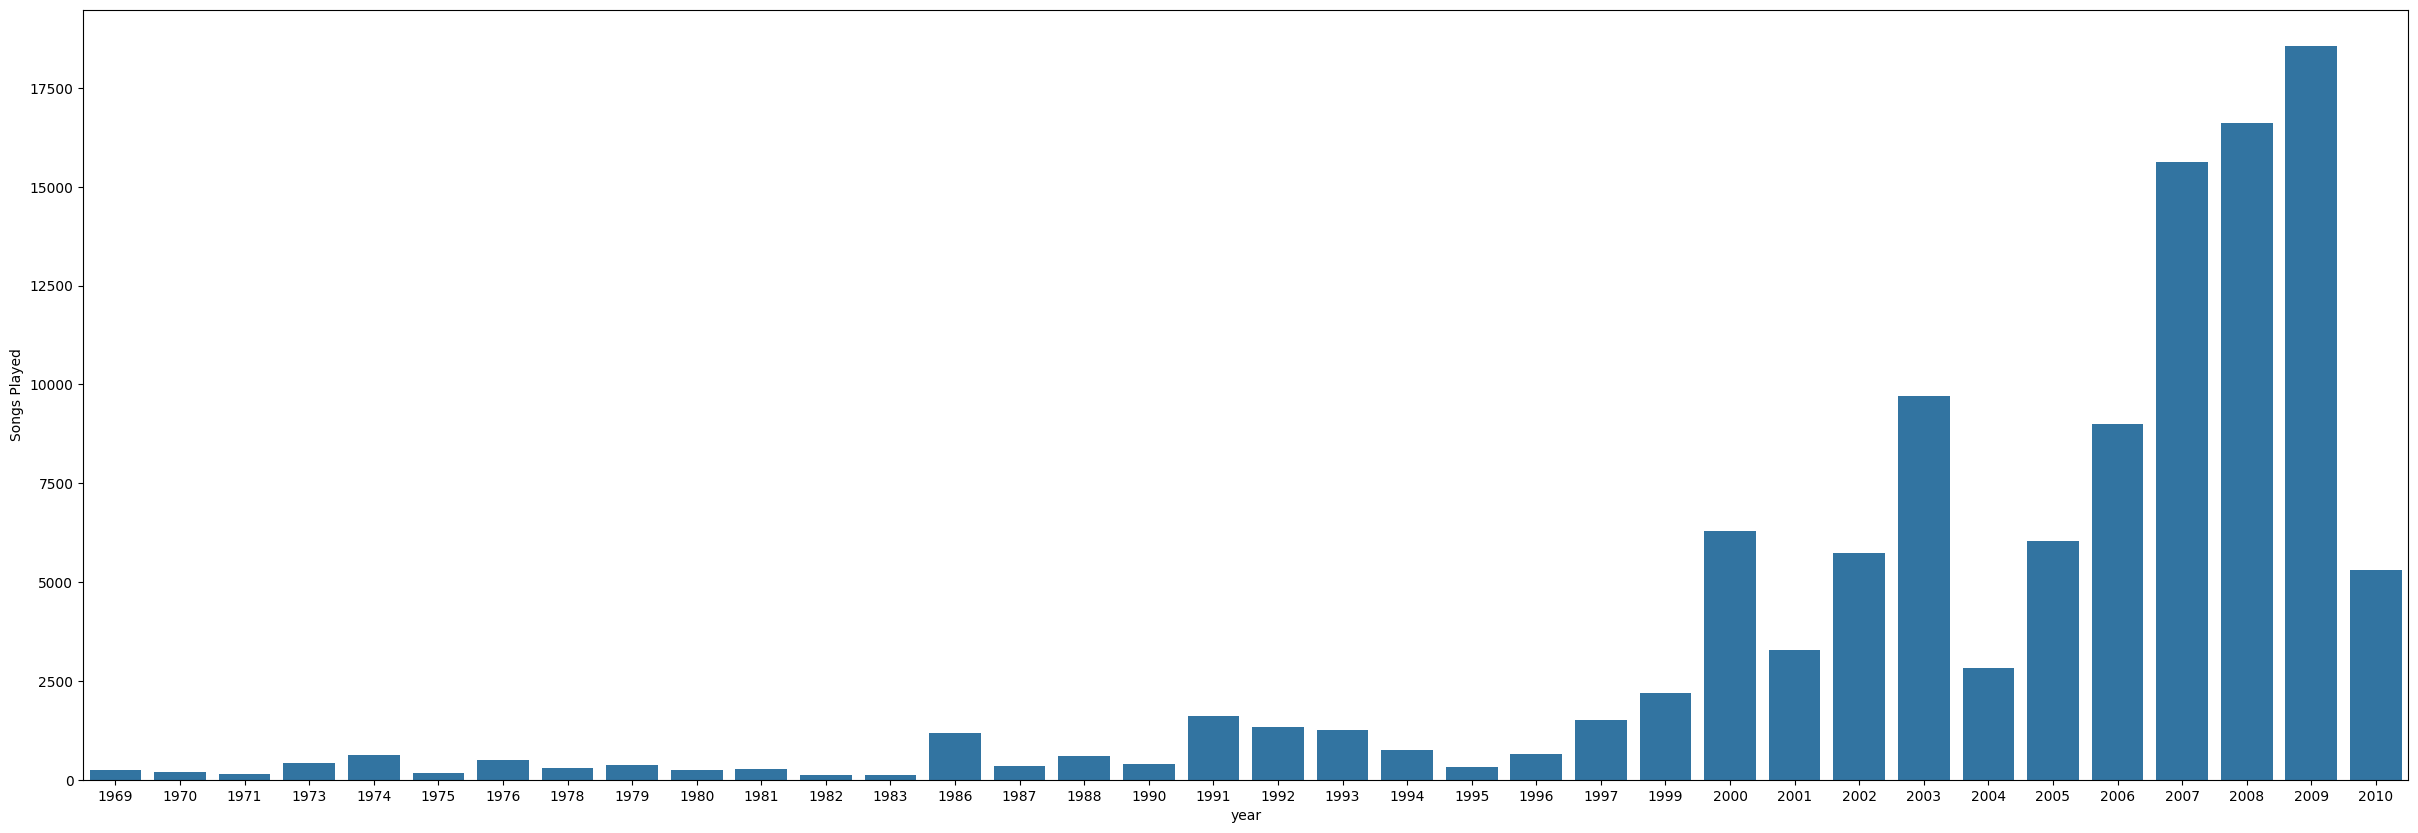

In [ ]:
# Create a barplot plot with y label as "number of titles played" and x -axis year

# Set the figure size
plt.figure(figsize = (30, 10))

sns.barplot(x = 'year',     # Set the x label of the plot
            y = 'title',    # Set the y label of the plot
            data = df_songs_per_year,  # Select correct dataframe to plot
            estimator = np.sum)        # Total songs

# Set the y label of the plot
plt.ylabel('Songs Played')

# Show the plot
plt.show()

#### **Observations and Insights:** #

- The data shows a relatively directly proportional relationship between time and airplay. This means that as time goes by, there are more plays of the catalog.

**Think About It:** What other insights can be drawn using exploratory data analysis?

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [ ]:
# Calculating average play_count
       # Hint: Use groupby function on the song_id column
average_play_count = df_final.groupby('song_id').mean()['play_count']

# Calculating the frequency a song is played
      # Hint: Use groupby function on the song_id column
song_play_frequency = df_final.groupby('song_id').count()['play_count']



In [ ]:
# Making a dataframe with the average_count and play_freq
df_total_airplay = pd.DataFrame({'average_play_count': average_play_count, 'song_play_frequency': song_play_frequency})

# Let us see the first five records of the final_play dataset
df_total_airplay.head() # Display the first five records of the final_play dataset

,average_play_count,song_play_frequency
song_id,,
21,1.631387,274
22,1.464286,140
50,1.616822,107
52,1.715232,453
62,1.727273,121


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
# Build the function to find top n songs

def top_n_songs(df_total_airplay, n, metric='song_play_frequency'): # Based on play frequency

    # Sort the dataframe by the specified metric in descending order
    sorted_df = df_total_airplay.sort_values(by=metric, ascending=False)

    # Return the top n rows
    return sorted_df.head(n)

In [ ]:
# Recommend top 10 songs using the function defined above

top_songs = top_n_songs(df_total_airplay, 10, metric='song_play_frequency')
print(top_songs)



         average_play_count  song_play_frequency
song_id                                         
8582               1.951311                 1602
6293               1.753165                 1264
3567               1.794297                  982
4270               1.593750                  960
1286               1.928261                  920
7796               1.824176                  910
310                1.751663                  902
7998               1.941463                  820
352                2.184539                  802
2220               2.205997                  767


### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [ ]:
# Install the surprise package using pip. Uncomment and run the below code to do the same

!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162670 sha256=570fea8386fd5b726eaa8fd3e2938e54d84522a9611ee36df2822b8808a4c047
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering


### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [ ]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions=model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)

    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

In [ ]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale=(1, 5)) #use rating scale (0, 5)

# Loading the dataset
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader) # Take only "user_id","song_id", and "play_count"

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.4, random_state = 42) # Take test_size = 0.4, random_state = 42

**Think About It:** How changing the test size would change the results and outputs?

In [ ]:
# Instantiate the KNNBasic model with the desired similarity options
sim_options = {'name': 'cosine', 'user_based': True}
user_user_sim = KNNBasic(sim_options=sim_options)

# Train the model on the training set
user_user_sim.fit(trainset)

# Make predictions on the test set
predictions = user_user_sim.test(testset)

# Compute precision@k, recall@k, and F1 score with k = 30
precision_recall_at_k(user_user_sim, k = 30, threshold = 1.5)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0817
Precision:  0.401
Recall:  0.705
F_1 score:  0.511


**Observations and Insights:**

- The model doesn't seem to have good performance as the RMSE is over 1 and it has low precision, recall and F1 score.

In [ ]:
# Predicting play_count for a sample user with a listened song

# Use any user id  and song_id
user_user_sim.predict('6958', '1671', r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='1671', r_ui=2, est=1.698939503494818, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
user_user_sim.predict('6958', '3232', verbose = True) #predict play_count for any sample user

user: 6958       item: 3232       r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='6958', iid='3232', r_ui=None, est=1.698939503494818, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

**Observations and Insights:**

- The model was unable to predict the 2 interactions.

Now, let's try to tune the model and see if we can improve the model performance.

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['cosine', 'pearson', 'pearson_baseline'],
                              'user_based': [True], 'min_support': [2, 4]}}

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting the data
gs.fit(data) # Use entire data for GridSearch

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.0031029454664224
{'k': 30, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}}


In [ ]:
# Train the best model found in above gridsearch
from surprise.prediction_algorithms import KNNBaseline

# Define the parameters
sim_options_improved = {
    'name': 'pearson_baseline',
    'user_based': True,
    'min_support': 2
}


# Train the model on the training set
user_user_sim_2 = KNNBaseline(k=30, min_k=9, sim_options=sim_options_improved)
user_user_sim_2.fit(trainset)



Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


**Observations and Insights:**

- The tuned model is significantly better than the original,

In [ ]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
user_user_sim_2.predict('6958', '1671', r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.70   {'was_impossible': False}


Prediction(uid='6958', iid='1671', r_ui=2, est=1.698939503494818, details={'was_impossible': False})

In [ ]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
user_user_sim_2.predict('6958', '97', verbose = True)

user: 6958       item: 97         r_ui = None   est = 1.70   {'was_impossible': False}


Prediction(uid='6958', iid='97', r_ui=None, est=1.698939503494818, details={'was_impossible': False})

**Observations and Insights:**

- The model predicted both cases successfuly.

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [ ]:
# Use inner id 0

user_user_sim_2.get_neighbors(0, 5)

[693, 27, 1387, 760, 1799]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot_table(index = 'user_id', columns = 'song_id', values = 'play_count')

    # Extracting those business ids which the user_id has not visited yet
    non_interacted_songs = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the business ids which user_id has not interacted yet
    for song_id in non_interacted_songs:

        # Predicting the ratings for those non visited restaurant ids by this user
        est = algo.predict(user_id, song_id).est

        # Appending the predicted ratings
        recommendations.append((song_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x : x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

In [ ]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, user_user_sim_2)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,7224,3.026333
1,1348,2.539373
2,3770,2.535135
3,6450,2.489824
4,6716,2.470882


**Observations and Insights:**

- The ranking is quite different from the popularity-based one.

### Correcting the play_counts and Ranking the above songs

In [ ]:
def ranking_songs(recommendations, final_rating):
    # Sort the songs based on play counts
    ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('song_play_frequency', ascending=False)[['song_play_frequency']].reset_index()

    # Merge with the recommended songs to get predicted play_count
    ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns=['song_id', 'predicted_ratings']), on='song_id', how='inner')

    # Rank the songs based on corrected play_counts
    ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['song_play_frequency'])

    # Sort the songs based on corrected play_counts
    ranked_songs = ranked_songs.sort_values('corrected_ratings', ascending=False)

    return ranked_songs


**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [ ]:
# Applying the ranking_songs function on the final_play data (df_total_airplay)
ranked_songs = ranking_songs(recommendations, df_total_airplay)

# Display the top ranked songs
print(ranked_songs.head())


   song_id  song_play_frequency  predicted_ratings  corrected_ratings
4     7224                  109           3.026333           2.930551
0     1348                  487           2.539373           2.494059
1     3770                  198           2.535135           2.464068
2     6716                  188           2.470882           2.397950
3     6450                  110           2.489824           2.394478


**Observations and Insights:**

- The last 2 songs in the ranking switched places.

### Item Item Similarity-based collaborative filtering recommendation systems

In [ ]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance

# Declaring the similarity options (not user-based)
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find desired similar items
item_item_sim = KNNBasic(sim_options=sim_options, random_state=1, verbose=False)

# Train the algorithm on the train set, and predict ratings for the test set
item_item_sim.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(item_item_sim, k=10)

RMSE: 1.0320
Precision:  0.328
Recall:  0.441
F_1 score:  0.376


**Observations and Insights:**

- The model disn't performed well and I expect the fine-tuned version to be much better.

In [ ]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user
predicted_play_count = item_item_sim.predict(6958, 1671)
print(f"\nPredicted rating for user {6958} and product {1671}: {predicted_play_count.est}")


Predicted rating for user 6958 and product 1671: 1.3695958289911163


In [ ]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)

from surprise import PredictionImpossible

try:
    predicted_play_count = item_item_sim.predict(11111111, 1671)
    print(f"\nPredicted play count for user {11111111} and song {1671}: {predicted_play_count.est}")
except PredictionImpossible as e:
    print(f"\nError: {e}")
    print("User-item interaction is unknown.")



Predicted play count for user 11111111 and song 1671: 1.698939503494818


**Observations and Insights:**

- The model was able to make a prediction in both cases.

In [ ]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [False], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print("Best RMSE score:", gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print("Best parameters:", gs.best_params['rmse'])



Best RMSE score: 0.9901123423234547
Best parameters: {'k': 20, 'min_k': 6, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [ ]:
# Apply the best model found in the grid search

from surprise import KNNBaseline

# Parameters
best_params = {'k': 20, 'min_k': 6, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}}

# Initialize the model with the best parameters
item_item_sim_2 = KNNBaseline(**best_params)

# Train the algorithm on the train set, and predict ratings for the test set
item_item_sim_2.fit(trainset)
predictions_item_item_sim_2 = item_item_sim_2.test(testset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


**Observations and Insights:**

- As expected, the tuned model has better performance, with a good RMSE that is lower than 1.

In [ ]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
item_item_sim_2_predicted_play_count = item_item_sim_2.predict(6958, 1671)
print(f"\nPredicted rating for user {6958} and product {1671}: {item_item_sim_2_predicted_play_count.est}")


Predicted rating for user 6958 and product 1671: 1.977945219168399


In [ ]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user
item_item_sim_2_predicted_play_count = item_item_sim_2.predict(6958, 3232)
print(f"\nPredicted rating for user {6958} and product {3232}: {item_item_sim_2_predicted_play_count.est}")


Predicted rating for user 6958 and product 3232: 1.593438963996733


**Observations and Insights:**

- With the new model, the prediction for the user that had previously heard the song is much higher.

- The prediction for the user that had not heard the song is relatively similar.

In [ ]:
# Find five most similar items to the item with inner id 0
item_item_sim_2.get_neighbors(0, 5)

[7, 527, 220, 15, 295]

In [ ]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
recommendations_item_item_2 = get_recommendations(df_final, 6958, 5, item_item_sim_2)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations_item_item_2, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,2914,3.286495
1,6450,3.129651
2,657,2.992300
3,7224,2.689296
4,7791,2.672061


In [ ]:
# Applying the ranking_songs function
ranked_songs_2 = ranking_songs(recommendations_item_item_2, df_total_airplay)

# Display the top ranked songs
print(ranked_songs_2.head())

   song_id  song_play_frequency  predicted_ratings  corrected_ratings
2     2914                  116           3.286495           3.193648
3     6450                  110           3.129651           3.034305
1      657                  159           2.992300           2.912995
0     7791                  540           2.672061           2.629028
4     7224                  109           2.689296           2.593514


**Observations and Insights:**

- The Item-Item similarity model had better performance than the User-User model.

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [ ]:
# Build baseline model using svd
# Using SVD matrix factorization. Use random_state = 1
svd = SVD(random_state=1)

# Training the algorithm on the train set
svd.fit(trainset)

# Use the function precision_recall_f1_score to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)

RMSE: 0.6590
Precision:  0.645
Recall:  0.814
F_1 score:  0.72


In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(6958, 1671, r_ui = 2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.41   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.4063526041916756, details={'was_impossible': False})

In [ ]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(111111, 1671, verbose=True)



user: 111111     item: 1671       r_ui = None   est = 1.46   {'was_impossible': False}


Prediction(uid=111111, iid=1671, r_ui=None, est=1.4575004096919482, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# Set the parameter space to tune
model_3_grid = {'n_epochs': [20, 30, 40], 'lr_all': [0.001, 0.005, 0.01], 'reg_all': [0.05, 0.1, 0.15]}

# Performe 3-fold grid-search cross-validation
gs_model_3 = GridSearchCV(SVD, model_3_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting data
gs_model_3.fit(data)

# Best RMSE score
print(gs_model_3.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs_model_3.best_params['rmse'])


0.9729339598153891
{'n_epochs': 40, 'lr_all': 0.01, 'reg_all': 0.1}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [ ]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs = 40, lr_all = 0.01, reg_all = 0.1, random_state = 1)


# Train the algorithm on the trainset
svd_optimized = svd_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_optimized)

RMSE: 0.6635
Precision:  0.693
Recall:  0.818
F_1 score:  0.75


**Observations and Insights:**

- The matrix factorization model is significantly better than the previous 2.

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671

svd_optimized.predict(6958, 1671, r_ui = 2, verbose = True)



user: 6958       item: 1671       r_ui = 2.00   est = 1.42   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.4174003541203504, details={'was_impossible': False})

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
svd_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.52   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5213136661809576, details={'was_impossible': False})

**Observations and Insights:**

- As expected, the model is able to make good predictions with the test data.

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
svd_recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)

In [ ]:
# Ranking songs based on above recommendations
ranking_songs(svd_recommendations, df_total_airplay)


,song_id,song_play_frequency,predicted_ratings,corrected_ratings
4,7224,109,3.308643,3.212860
3,6450,110,2.780780,2.685434
0,2220,767,2.497187,2.461079
2,2914,116,2.530171,2.437323
1,6084,122,2.415955,2.325420


**Observations and Insights:**

- Since this model had much better performance, I would trust this ranking more.

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities
and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [ ]:
# Make baseline clustering model

# Using CoClustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_baseline)

RMSE: 0.9698
Precision:  0.438
Recall:  0.653
F_1 score:  0.524


In [ ]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.26   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2649284112936172, details={'was_impossible': False})

In [ ]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user
clust_baseline.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.26   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2556520959637232, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [ ]:
from surprise import CoClustering

# Set the parameter space to tune
param_grid_cluster = {'n_cltr_u': [3, 4, 5, 6], 'n_cltr_i': [3, 4, 5, 6], 'n_epochs': [30, 40, 50]}

# Performing 3-fold grid search cross-validation
gs_cluster = GridSearchCV(CoClustering, param_grid_cluster, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs_cluster.fit(data)

# Best RMSE score
print(gs_cluster.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs_cluster.best_params['rmse'])


1.0374257804784262
{'n_cltr_u': 3, 'n_cltr_i': 3, 'n_epochs': 50}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [ ]:
# Train the tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 3, n_cltr_i = 3, n_epochs = 30, random_state = 1)
clust_tuned.fit(trainset)
precision_recall_at_k(clust_tuned)

RMSE: 0.9698
Precision:  0.439
Recall:  0.653
F_1 score:  0.525


**Observations and Insights:**

- Not great performance from the cluster-based model.

In [ ]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned.predict(6958, 1671, r_ui = 2, verbose = True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.26   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.264875015783286, details={'was_impossible': False})

In [ ]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
clust_tuned.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.25   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2527923641562548, details={'was_impossible': False})

**Observations and Insights:**

- Although the model made predictions, they don't seem to be very accurate based on the first case here.

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
clustering_recommendations = get_recommendations(df_final, 6958, 5, clust_tuned)

### Correcting the play_count and Ranking the above songs

In [ ]:
# Ranking songs based on the above recommendations
ranking_songs(clustering_recommendations, df_total_airplay)


,song_id,song_play_frequency,predicted_ratings,corrected_ratings
4,7224,109,3.191058,3.095275
3,6450,110,2.442267,2.346921
0,5531,664,2.129808,2.091001
2,8483,130,2.131778,2.044072
1,614,401,2.060993,2.011056


**Observations and Insights:**

- The top 2 songs produced are the same as the matrix factorization model.

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

> Indented block



In [ ]:
df_small = df_final

In [ ]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small['text'] = df_small.apply(lambda row: ' '.join([str(row['title']), str(row['release']), str(row['artist_name'])]), axis=1)

In [ ]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
selected_columns = ['user_id', 'song_id', 'play_count', 'title', 'text']
df_selected = df_small[selected_columns]

# Drop the duplicates from the title column
df_selected.drop_duplicates(subset='title', inplace=True)

# Set the title column as the index
df_selected.set_index('title', inplace=True)

# See the first 5 records of the df_small dataset
df_selected.head(5)



,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [ ]:
df_selected.shape

(629, 4)

In [ ]:
# Create the series of indices from the data
indices = pd.Series(df_selected.index)

indices


0                   Daisy And Prudence
1      The Ballad of Michael Valentine
2            I Stand Corrected (Album)
3                They Might Follow You
4                           Monkey Man
                    ...               
624                      The Last Song
625                         Invincible
626                      Paper Gangsta
627                          Starlight
628         Tangerine  (Album Version)
Name: title, Length: 629, dtype: object

In [ ]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download("punkt")

# Download stopwords library
nltk.download("stopwords")

# Download wordnet
nltk.download("wordnet")

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


We will create a **function to pre-process the text data:**

In [ ]:
# Create the tokenize function
def tokenize(text):

    # Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    # Extracting each word in the text
    tokens = word_tokenize(text)

    # Removing stopwords
    words = [word for word in tokens if word not in stopwords.words('english')]

    # Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [ ]:
# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit_transfrom the above vectorizer on the text column and convert the output into an array
song_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

In [ ]:
# Making the DataFrame of song_tfidf data
pd.DataFrame(song_tfidf)


,0,1,2,3,4,5,6,7,8,9,...,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(tfidf_array, tfidf_array)

similar_songs

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.03257364],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.03257364, ..., 0.        , 0.        ,
        1.        ]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [ ]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations_cb_filtering(title, similar_songs):

    recommended_songs_cb_filtering = []

    indices = pd.Series(df_selected.index)

    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indices of 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs_cb_filtering.append(list(df_selected.index)[i])

    return recommended_songs_cb_filtering



In [ ]:
recommendations_cb_filtering('Learn To Fly', similar_songs)

[445, 520, 246, 367, 429, 421, 416, 417, 418, 419]


['Big Me',
 'Everlong',
 'The Pretender',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Up Up & Away',
 "Ghosts 'n' Stuff (Original Instrumental Mix)",
 'Closer',
 'No Cars Go',
 'Do We Need This?']

Recommending 10 songs similar to Learn to Fly

**Observations and Insights:**

- The Content-Based Filtering model seems to be really good at finding similar songs.

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- Each model serves a purpose, for example, model based and cluster based models are good incorporating past behavior into prediction, but miss incorporating similarities among users and items. Content based filtering is good because it uses metadata to find similarities, which can be very useful.

**2. Refined insights**:
- Different data can be useful in different ways.

**3. Proposal for the final solution design:**
- To build a combined model between Model-Based and Content-Based filtering to produce an outcome that is very useful by combining past behavior with metadata utilization to find similarities and make recommendations.